In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# Note, after my presentation, I tested a Naive Bayes classifier 
# and outperformed my SVM- don't know why I didn't think to try this 
# earlier

%matplotlib inline

In [23]:
# Import, create train test split
forest_train_set = pd.read_csv('training.csv')
forest_test_set  = pd.read_csv("testing.csv")


scaler_1 = StandardScaler()
y_train = forest_train_set["class"]
X_train = forest_train_set[["b1","b2","b3","b4","b5","b6","b7","b8","b9"]]
X_train_s = scaler_1.fit_transform(X_train)

scaler_2 = StandardScaler()
y_test = forest_test_set["class"]
X_test = forest_test_set[["b1","b2","b3","b4","b5","b6","b7","b8","b9"]]
X_test_s = scaler_2.fit_transform(X_test)
# Maker sure to scale by using Standard Scaler
#scaler = preprocessing.StandardScaler()
#scaled_df = scaler.fit_transform(df)

In [32]:
forest_train_set.groupby(by = "class").count()
forest_test_set.groupby(by = "class").count()


,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
class,,,,,,,,,,,,,,,,,,,,,
d,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105
h,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
o,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
s,136,136,136,136,136,136,136,136,136,136,...,136,136,136,136,136,136,136,136,136,136


In [11]:
X_train_s

array([[-1.8787969 , -0.28223274, -0.3865936 , ...,  0.15428138,
        -0.18893459, -0.11433257],
       [ 1.6513761 , -0.61954914, -0.3865936 , ...,  0.08997041,
        -0.3006034 ,  0.09053484],
       [-0.78052085, -0.90064614, -0.84980409, ..., -0.4245174 ,
        -0.3006034 , -0.31919997],
       ..., 
       [ 1.25913466, -0.61954914, -0.50239623, ...,  1.18325699,
        -0.4122722 , -0.21676627],
       [ 0.47465177, -0.78820734, -0.61819885, ..., -0.23158447,
        -0.523941  , -0.62650107],
       [ 1.33758295, -0.67576854, -0.50239623, ...,  0.73308016,
        -0.4122722 , -0.21676627]])

In [5]:
#one vs. rest svm, my naive test, with rbf and an arbitrary value 
# for C

# Test using the value from the literature c = 1010, gamma = 1.95
n_svm = svm.SVC(kernel = "rbf", C = 1010, gamma = 1.95)
n_svm.fit(X_train_s, y_train)


SVC(C=1010, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.95, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
import pickle

pickle.dump(n_svm.fit, open("pickled_svm.p", "wb"))
scaler_1.mean_
scaler
pickle.dump

#pickle.dump(lreg, open("pickled_linear_regressions.p", "wb"))

In [12]:
from sklearn import metrics

predictions = n_svm.predict(X_test_s)
c_matrix= metrics.confusion_matrix(y_test, predictions)
quick_score = n_svm.score(X_test_s, y_test)

print(predictions)
print(y_test)

print(c_matrix)
print(quick_score)

# looking at the confusion matrix, it seems to be overclassifying
#wha ["d","h","o","s"]
# Seems to be overclassifying the Shugi forest
# Not very accurate?

# was throwing some kind of error when I tried to print all the labels
# labels=np.array(["d","h","o","s"]) <-- was included in c_matrix


# Note- values when C= 5, and gamma = auto
#[[  4   0   0 101]
# [  0  12   0  26]
# [  0   0   0  46]
# [  0   1   0 135]]
# 0.464615384615

# Compare to  the values from literature- gamma = 1.95
# and c = 1010:

#[[  0   0   0 105]
# [  0   0   0  38]
# [  0   0   0  46]
# [  0   0   0 136]]
# 0.418461538462

# the lit values actually do worse?
# it seems to push things in teh direction of classifying everything
# as sugi
# Note 136 is the correct number of sugi classification


# FORGOT TO SCALE
# http://benalexkeen.com/feature-scaling-with-scikit-learn/
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Accuracy improved once scaled


# "h" = hinoki = cypress
#  "s" = sugi = cedar
#  d = decidious
#  o = other,
# (note on confusion matrices: columns are predicted, rows are actual)
# ["d","h","o","s"]
#  [[70  1 29  5]
# [ 0 27  6  5]
# [ 5  0 41  0]
# [ 1 33 16 86]]
# 0.689230769231

['o ' 'h ' 's ' 'o ' 's ' 'o ' 'h ' 'o ' 'h ' 'd ' 'h ' 'o ' 'd ' 'h ' 'o '
 's ' 'o ' 'o ' 's ' 'd ' 'o ' 'd ' 'd ' 's ' 's ' 's ' 'h ' 'd ' 'h ' 'd '
 's ' 'o ' 'h ' 's ' 'o ' 'd ' 'o ' 'd ' 's ' 'o ' 'd ' 'h ' 'o ' 'o ' 'h '
 'o ' 's ' 's ' 'h ' 's ' 'o ' 'o ' 'h ' 'h ' 'd ' 'o ' 'h ' 'o ' 'h ' 'h '
 's ' 'o ' 's ' 's ' 'h ' 's ' 'd ' 'o ' 'd ' 's ' 'h ' 'd ' 'o ' 's ' 'h '
 'h ' 'h ' 's ' 's ' 's ' 'd ' 's ' 'h ' 'h ' 'd ' 's ' 'h ' 'o ' 'd ' 's '
 'o ' 'd ' 'o ' 's ' 's ' 'd ' 'd ' 'h ' 'd ' 'o ' 's ' 'h ' 's ' 's ' 's '
 'h ' 'o ' 'o ' 'o ' 'h ' 'o ' 'd ' 'o ' 'o ' 's ' 'o ' 'o ' 's ' 's ' 'h '
 'd ' 'h ' 'd ' 's ' 's ' 'h ' 'd ' 'd ' 'd ' 'o ' 'd ' 'd ' 'h ' 's ' 'd '
 's ' 'o ' 'd ' 'o ' 'o ' 'd ' 'd ' 'h ' 'o ' 's ' 'd ' 'o ' 'o ' 's ' 'h '
 'h ' 'd ' 'o ' 'd ' 'o ' 'd ' 'o ' 'd ' 'h ' 'd ' 's ' 'o ' 'd ' 's ' 'h '
 'o ' 'd ' 'o ' 's ' 'h ' 's ' 'o ' 'd ' 's ' 's ' 'h ' 'd ' 's ' 'd ' 'd '
 'o ' 'd ' 's ' 'o ' 'd ' 's ' 'o ' 'o ' 'd ' 's ' 'o ' 'h ' 's ' 'o ' 'd '
 'o ' 'h ' '

In [ ]:
# Test using the value from the literature c = 1010, gamma = 1.95
#n_svm = svm.SVC(kernel = "rbf", C = 1010, gamma = 1.95)
#n_svm.fit(X_train_s, y_train)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
# Grid Search-
#  
param_grid = [{'C': np.arange(100, 2000, 50), 'kernel':['linear']},
              {'C': np.arange(100, 2000, 20), 'gamma': np.arange(
              1, 3, .05), 'kernel':['rbf']}
             ]

svm_param_search = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy')
svm_param_search.fit(X_train_s, y_train)
print (svm_param_search.best_params_)


#{'C': 100, 'kernel': 'linear'}



#clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
#                       scoring='%s_macro' % score)
#    clf.fit(X_train, y_train)
#param_grid = [
# {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]

#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py

{'C': 400, 'kernel': 'linear'}


In [37]:
best_svm = svm.SVC(kernel = "linear", C = 400)
best_svm.fit(X_train_s, y_train)


predictions_bsvm = best_svm.predict(X_test_s)
c_matrix= metrics.confusion_matrix(y_test, predictions_bsvm)
quick_score = n_svm.score(X_test_s, y_test)
print(quick_score)
print(c_matrix)

#  predicted label
# [ "d","h","o","s"]
#d  [[79  4 16  6]    79/105
#h   [ 0 32  0  6]    32/38
# o  [10  0 35  1]    35/46
# s  [ 2 38  0 96]]   96/136

#Misclassifies hinoki as sugi

0.689230769231
[[79  4 16  6]
 [ 0 32  0  6]
 [10  0 35  1]
 [ 2 38  0 96]]


In [ ]:
# Grid search and testing on other algorithms
# logistic_reg
# random_forest
# naive_bayes

# form-
# param_grid
# param_search_obj
# fit on training set
# get best params
# get accuracy/cf of best model

# compare across models







In [73]:
from sklearn import naive_bayes
from sklearn import metrics



nb_clf = naive_bayes.GaussianNB()

from sklearn.model_selection import cross_val_score

print(cross_val_score(nb_clf, X_train_s, y_train, cv=5))


nb_clf.fit(X_train_s, y_train)
y_pred = nb_clf.predict(X_test_s)
print(metrics.accuracy_score(y_test, y_pred))
# acc = .72
# Can I cross validate naive bayes?  What does it do during training
# learn values for the features... but Bayes should converge, right?
# so do normal CV splits really yield anything different?



[ 0.92682927  0.85365854  0.95        0.97435897  0.94594595]
0.72


[ 0.92682927  0.85365854  0.95        0.97435897  0.94594595]


In [74]:
# Don't bother with logistic reg- b.c. one vs. rest seems trickier 
# to interpret

#from sklearn import linear_model
#lr_clf = linear_model.LinearRegression()
#lr_clf.fit(X_train_s, y_train)
#lr_clf.predict(X_test)
#print(metrics.accuracy_score(y_test, y_pred))
# not going to paramater tune using lasso or ridge, b.c. only 9 features

In [76]:
# Random Forest:  Random Forest seems kind of weird, because the 
# suggested/default number of features per tree is 3 (root(feat))
# small - try it anyway

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# params of interest #  n_estimators=10, criterion=’gini’, 
# max_depth=None, min_samples_split=2, min_samples_leaf=1, 
# min_weight_fraction_leaf=0.0, max_features=’auto’,

param_grid = [{'n_estimators': np.arange(10, 50, 10), 
               'max_features':np.arange(3,8) } ]
             


rfc_gs = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, scoring = 'accuracy')
rfc_gs.fit(X_train_s, y_train)
print (rfc_gs.best_params_)





#param_grid = [{'C': np.arange(100, 2000, 50), 'kernel':['linear']},
 #             {'C': np.arange(100, 2000, 20), 'gamma': np.arange(
  #            1, 3, .05), 'kernel':['rbf']}
   #          ]

#svm_param_search = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy')
#svm_param_search.fit(X_train_s, y_train)
#print (svm_param_search.best_params_)
# {'max_features': 6, 'n_estimators': 10}  <- should I be worried that
# this max feature doesn't align with the default? overfitting?

{'max_features': 6, 'n_estimators': 10}


In [81]:
rfc_best = RandomForestClassifier(max_features = 6, n_estimators = 10)
rfc_best.fit(X_train_s, y_train)
rfc_pred = rfc_best.predict(X_test_s)
print(metrics.accuracy_score(y_test, rfc_pred))

#predictions_bsvm = best_svm.predict(X_test_s)
#c_matrix= metrics.confusion_matrix(y_test, predictions_bsvm)
#quick_score = n_svm.score(X_test_s, y_test)
#print(quick_score)
#print(c_matrix)

0.701538461538


[[79  4 16  6]
 [ 0 32  0  6]
 [10  0 35  1]
 [ 2 38  0 96]]


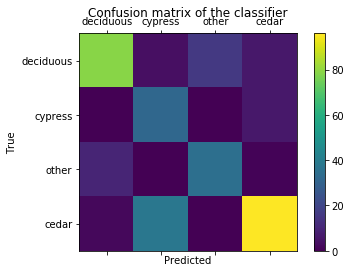

In [38]:
# Cm recipe from- https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/31720054
# but doesn't seem what I want
labels = ['deciduous','cypress','other',"cedar"]
print(c_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(c_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#true pos rate
#0.7523809523809524
#0.8421052631578947
#0.7608695652173914
#0.7058823529411765


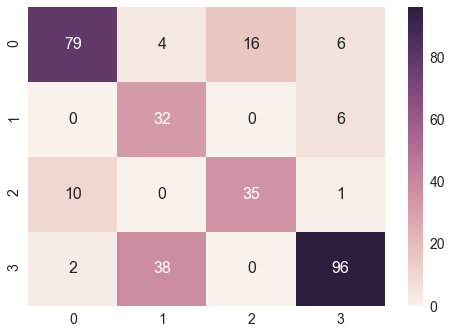

In [39]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

sn.set(font_scale=1.4)#for label size
sn.heatmap(c_matrix, annot=True,annot_kws={"size": 16})# font size

In [35]:
print("true pos rate")
print(79/105) #d
print(32/38) # h <- tends to classify this correctly, but then over classifies the related forest type
print(35/46) #o
print(96/136) #s <- underclassifies

true pos rate
0.7523809523809524
0.8421052631578947
0.7608695652173914
0.7058823529411765


In [60]:
true_d_per = list(np.divide(c_matrix[0],105))
true_cyp_per=  list(np.divide(c_matrix[1], 38))
true_o_per = list(np.divide(c_matrix[2], 46))
true_ced_per = list(np.divide(c_matrix[3], 136) )

conf_mat_per = [true_d_per, true_cyp_per, true_o_per, true_ced_per]
conf_mat_per
confusion_matrix_as_percent = np.array(conf_mat_per)
confusion_matrix_as_percent


array([[ 0.75238095,  0.03809524,  0.15238095,  0.05714286],
       [ 0.        ,  0.84210526,  0.        ,  0.15789474],
       [ 0.2173913 ,  0.        ,  0.76086957,  0.02173913],
       [ 0.01470588,  0.27941176,  0.        ,  0.70588235]])

In [ ]:
confusion_matrix_as_percent

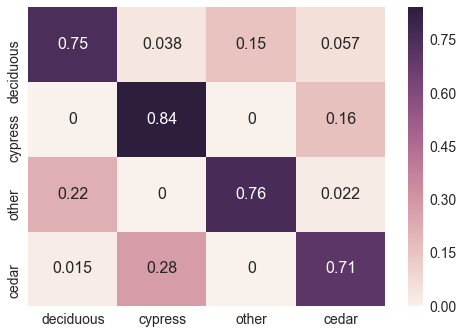

In [62]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ticklabels = ['deciduous','cypress','other',"cedar"] 
sn.set(font_scale=1.4)#for label size
sn.heatmap(confusion_matrix_as_percent, annot=True,
           xticklabels = ticklabels, yticklabels =ticklabels, 
           annot_kws={"size": 16})# font size

In [ ]:
np.divide(c_matrix[0],105)
np.divide(c_matrix[1], 38)
np.divide(c_matrix[2], 46)
np.divide(c_matrix[3], 136) 


In [ ]:
# True totals for test split
d 105 
h 38 
o 46 
s 136

In [ ]:

# Just Recopied notes from SKlearn

# Then do a grid search over the parameter space
#  from sklearn.model_selection import GridSearchCV


 Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.a